In [3]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['font.size'] = 18
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步 E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata
os.chdir(r'E:\BaiduSyncdisk\WBGT-文献及初稿\heatwavedata')


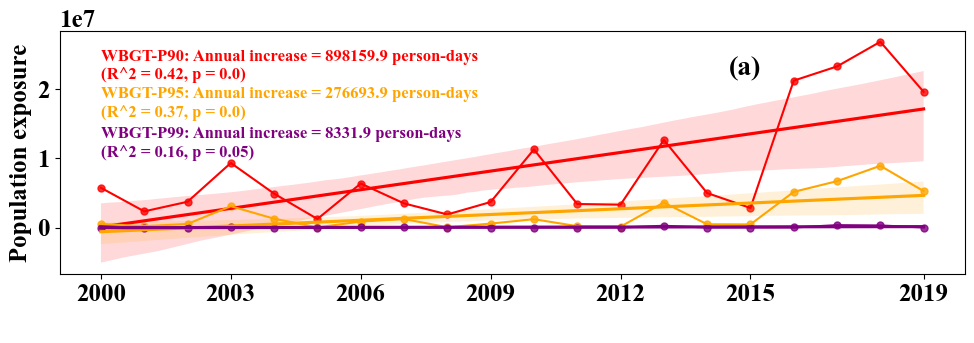

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Load the data
file_path = '热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Group by 'Year' and sum relevant exposure columns
columns_to_group = ['Population_Exposure_TX90', 'Population_Exposure_TX95', 'Population_Exposure_TX99']
province_yearly_exposure_all = data.groupby(['Year'])[columns_to_group].sum().reset_index()

# Define a function for linear regression analysis
def lm_func(df, col):
    """Simple linear model for time series data, returns coef, R^2, and p-value."""
    # Prepare data
    X_year = np.array(df["Year"]).reshape((-1, 1))
    Y_stats = np.array(df[col]).reshape((-1, 1))

    # Add Intercept
    X_year_2 = sm.add_constant(X_year)

    # Fit the model
    model = sm.OLS(Y_stats, X_year_2).fit()
        
    coef = model.params[1]  # Slope coefficient
    r2 = model.rsquared_adj
    p = model.pvalues[1]  # p-value for the slope
    
    return coef, round(r2, 2), round(p, 2)

# Initialize the plot for multiple regression curves
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplots_adjust(left=0.07, right=0.975, top=0.9, bottom=0.09)

# Define colors for each column
colors = {
    'Population_Exposure_TX90': 'red',
    'Population_Exposure_TX95': 'orange',
    'Population_Exposure_TX99': 'purple'
}

# Define custom text labels for each column
text_labels = {
    'Population_Exposure_TX90': 'WBGT-P90',
    'Population_Exposure_TX95': 'WBGT-P95',
    'Population_Exposure_TX99': 'WBGT-P99'
}

# Plot each column with its regression line and add colored text annotations
for col in columns_to_group:
    sns.regplot(x="Year", y=col, data=province_yearly_exposure_all, color=colors[col],scatter_kws={'s': 25}, marker='o')
    sns.lineplot(data=province_yearly_exposure_all, x="Year", y=col, color=colors[col])

    # Calculate regression coefficients, R^2, and p-value
    coef, r2, p = lm_func(province_yearly_exposure_all, col)
    text = f'{text_labels[col]}: Annual increase = {round(coef, 1)} person-days\n(R^2 = {round(r2, 2)}, p = {p})'
    
    # Set specific annotation positions for each column
    if col == 'Population_Exposure_TX90':
        y_position = province_yearly_exposure_all[col].max() * 0.8
    elif col == 'Population_Exposure_TX95':
        y_position = province_yearly_exposure_all[col].max() * 1.8
    elif col == 'Population_Exposure_TX99':
        y_position = province_yearly_exposure_all[col].max() * 30
    plt.text(x=province_yearly_exposure_all['Year'].min(), y=y_position, s=text, size=12, color=colors[col])

# Set labels and limit x-axis ticks to first, last, and every third year in between
ax.set_ylabel('Population exposure')
ax.set_xlabel(' ')
year_ticks = list(range(province_yearly_exposure_all['Year'].min(), province_yearly_exposure_all['Year'].max() + 1, 3))
year_ticks[0] = province_yearly_exposure_all['Year'].min()  # Ensure the first year is included
year_ticks[-1] = province_yearly_exposure_all['Year'].max()  # Ensure the last year is included
ax.set_xticks(year_ticks)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))
plt.text(x=2014.5, y=2.2e+07, s="(a)", size=20, color='black')
# Remove the legend
plt.rcParams['font.sans-serif'] = 'Times New Roman'

# Save and show the plot
plt.savefig('Multiple_exposure_regressions.png', dpi=400, facecolor="none", transparent=True)
plt.show()


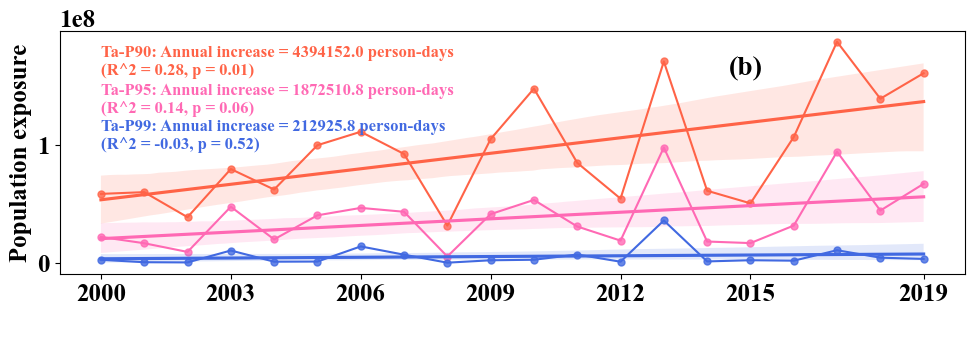

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Load the data
file_path = '热浪暴露固定效应模型-人口暴露除以10000.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Group by 'Year' and sum relevant exposure columns
columns_to_group = ['Population_Exposure_P90', 'Population_Exposure_P95', 'Population_Exposure_P99']
province_yearly_exposure_all = data.groupby(['Year'])[columns_to_group].sum().reset_index()

# Define a function for linear regression analysis
def lm_func(df, col):
    """Simple linear model for time series data, returns coef, R^2, and p-value."""
    # Prepare data
    X_year = np.array(df["Year"]).reshape((-1, 1))
    Y_stats = np.array(df[col]).reshape((-1, 1))

    # Add Intercept
    X_year_2 = sm.add_constant(X_year)

    # Fit the model
    model = sm.OLS(Y_stats, X_year_2).fit()
        
    coef = model.params[1]  # Slope coefficient
    r2 = model.rsquared_adj
    p = model.pvalues[1]  # p-value for the slope
    
    return coef, round(r2, 2), round(p, 2)

# Define custom text labels for each column
text_labels = {
    'Population_Exposure_P90': 'Ta-P90',
    'Population_Exposure_P95': 'Ta-P95',
    'Population_Exposure_P99': 'Ta-P99'
}

# Initialize the plot for multiple regression curves
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplots_adjust(left=0.07, right=0.975, top=0.9, bottom=0.09)

# Define colors for each column
colors = {
    'Population_Exposure_P90': 'tomato',
    'Population_Exposure_P95': 'hotpink',
    'Population_Exposure_P99': 'royalblue'
}

# Plot each column with its regression line and add colored text annotations
for col in columns_to_group:
    sns.regplot(x="Year", y=col, data=province_yearly_exposure_all, color=colors[col],scatter_kws={'s': 25}, marker='o')
    sns.lineplot(data=province_yearly_exposure_all, x="Year", y=col, color=colors[col])

    # Calculate regression coefficients, R^2, and p-value
    coef, r2, p = lm_func(province_yearly_exposure_all, col)
    text = f'{text_labels[col]}: Annual increase = {round(coef, 1)} person-days\n(R^2 = {round(r2, 2)}, p = {p})'
    
    # Set specific annotation positions for each column
    if col == 'Population_Exposure_P90':
        y_position = province_yearly_exposure_all[col].max() * 0.85
    elif col == 'Population_Exposure_P95':
        y_position = province_yearly_exposure_all[col].max() * 1.3
    elif col == 'Population_Exposure_P99':
        y_position = province_yearly_exposure_all[col].max() * 2.7
    plt.text(x=province_yearly_exposure_all['Year'].min(), y=y_position, s=text, size=12, color=colors[col])

# Set labels and limit x-axis ticks to first, last, and every third year in between
ax.set_ylabel('Population exposure')
ax.set_xlabel(' ')
year_ticks = list(range(province_yearly_exposure_all['Year'].min(), province_yearly_exposure_all['Year'].max() + 1, 3))
year_ticks[0] = province_yearly_exposure_all['Year'].min()  # Ensure the first year is included
year_ticks[-1] = province_yearly_exposure_all['Year'].max()  # Ensure the last year is included
ax.set_xticks(year_ticks)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))

plt.text(x=2014.5, y=1.6e+08, s="(b)", size=20, color='black')
# Remove the legend
plt.rcParams['font.sans-serif'] = 'Times New Roman'

# Save and show the plot
plt.savefig('Multiple_exposure_regressions-p.png', dpi=400, facecolor="none", transparent=True)
plt.show()


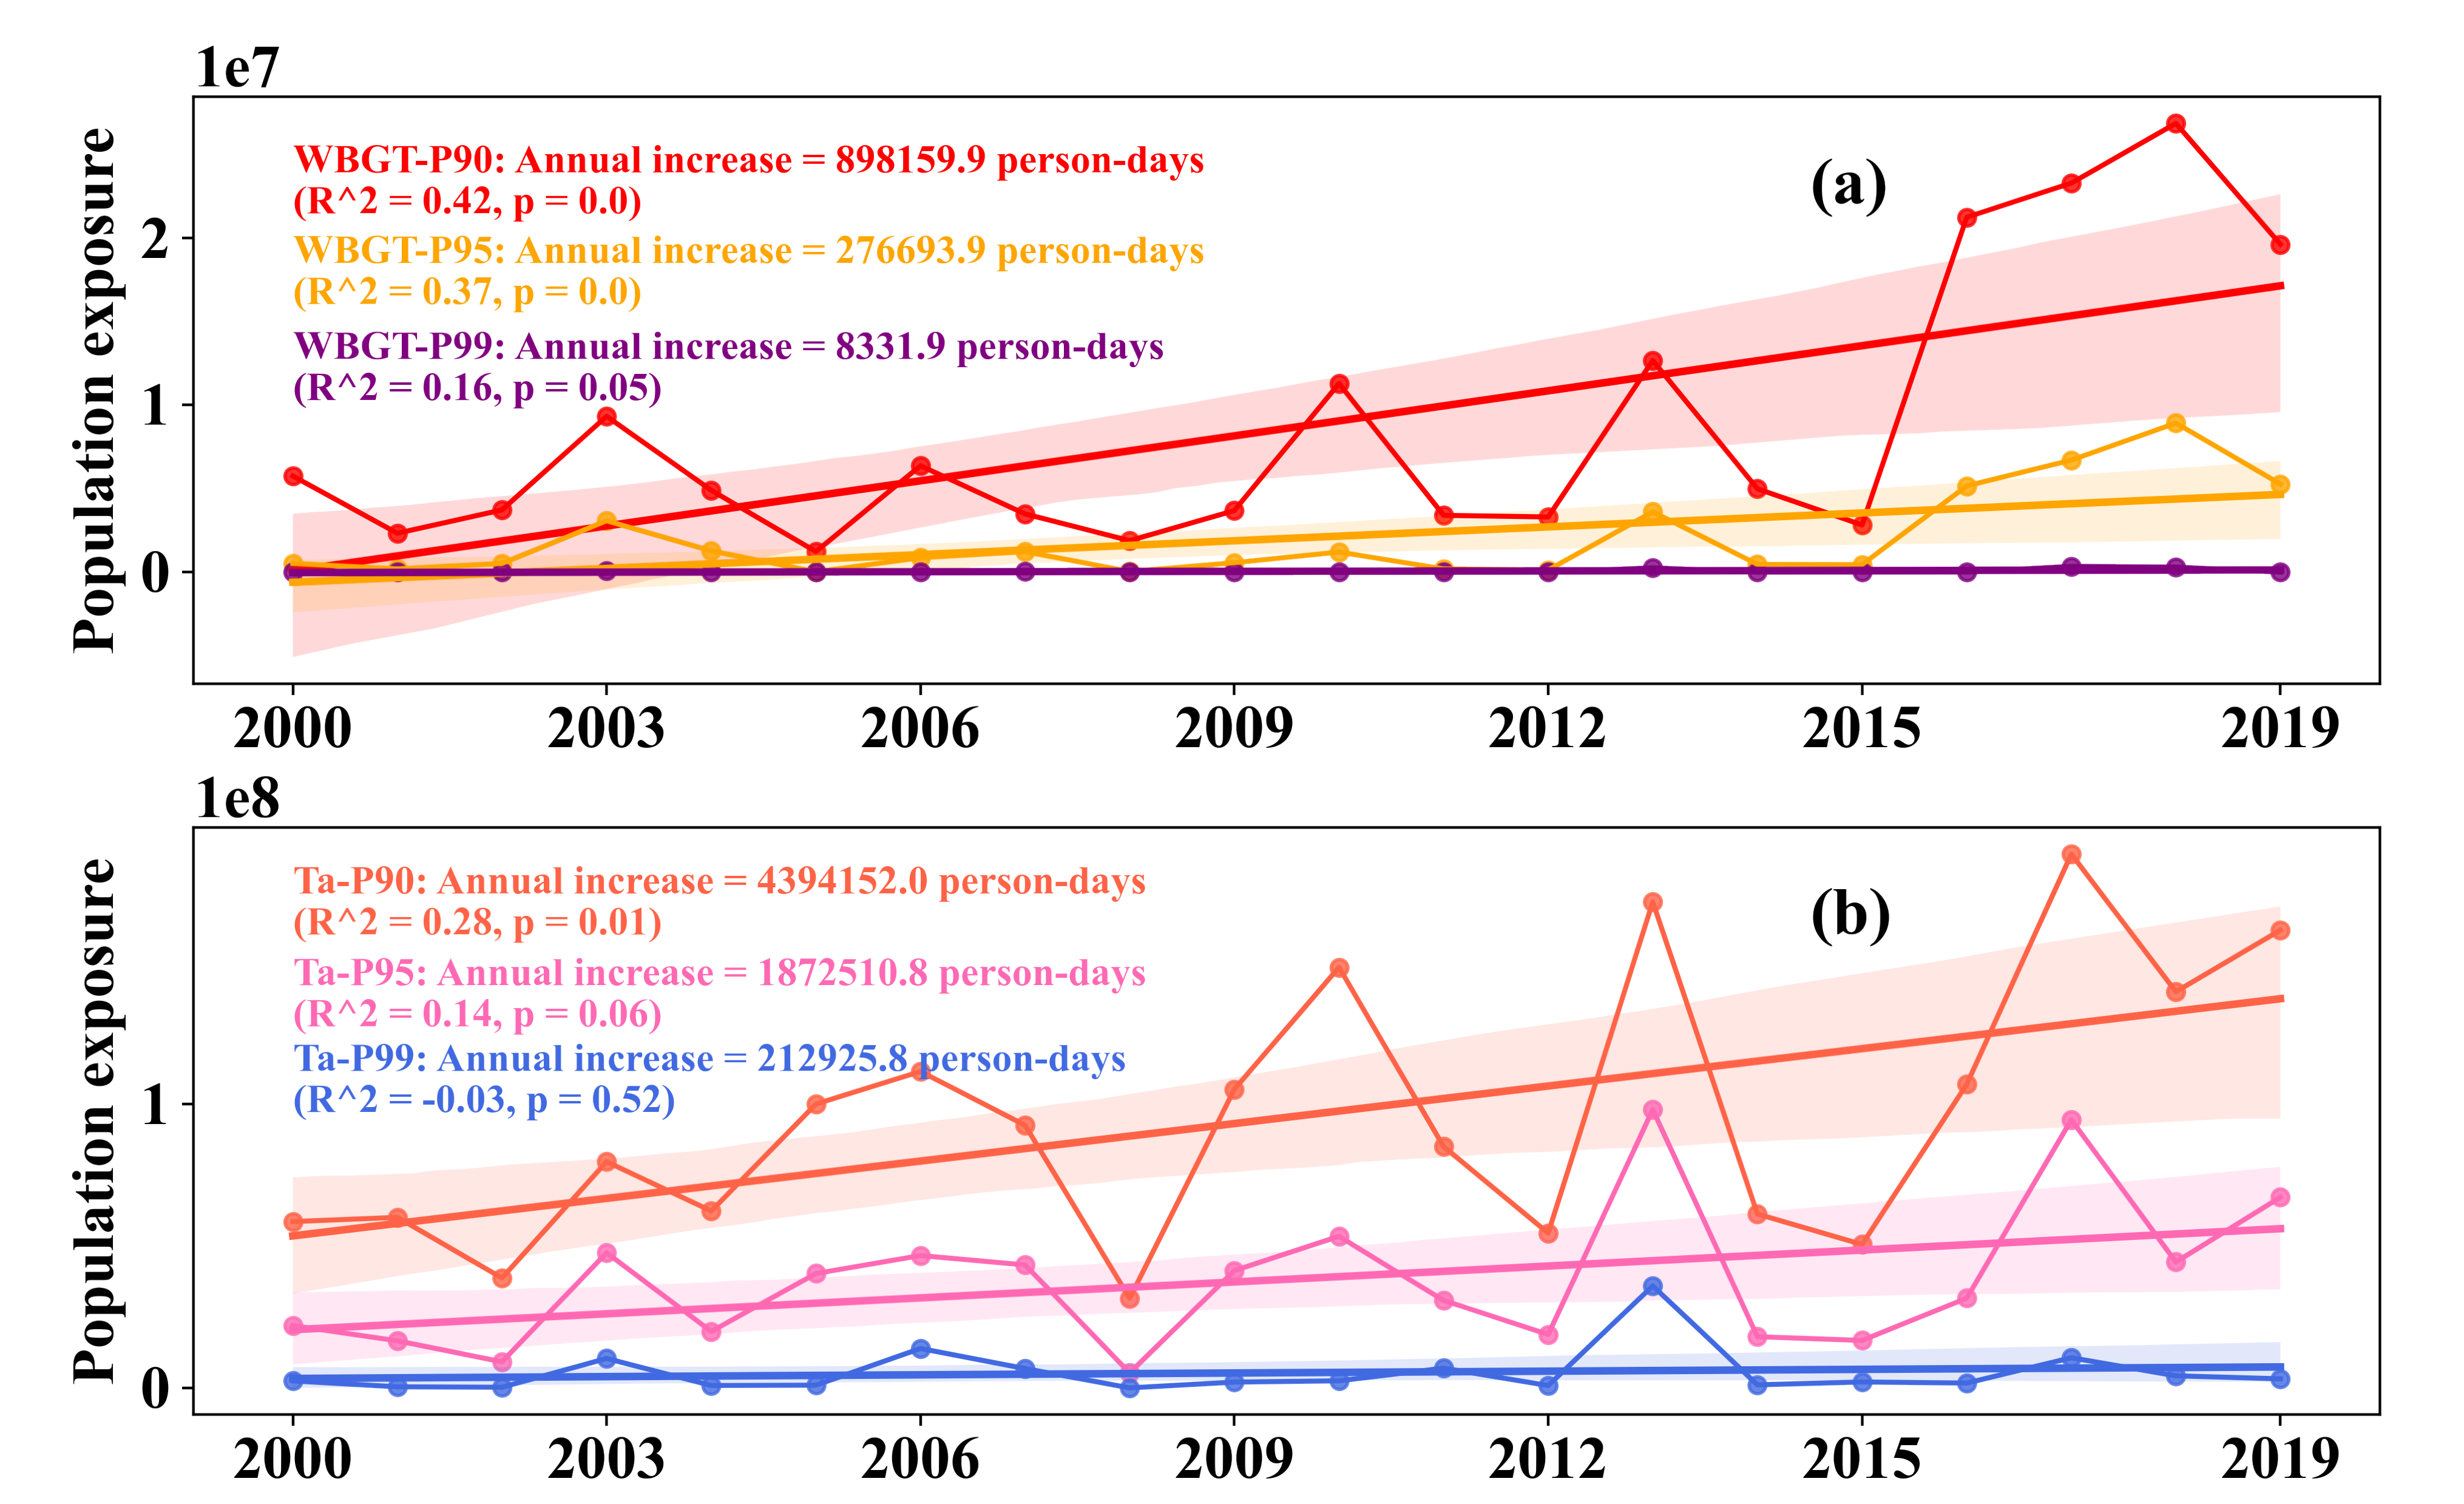

In [7]:
image1 = mpimg.imread('Multiple_exposure_regressions.png')
image2 = mpimg.imread('Multiple_exposure_regressions-p.png')

from PIL import Image
plt.figure(figsize=(10,6), dpi=400)
plt.figure(1)

plt.subplot(211)#22 分割成2行2列，选中第一个
plt.axis('off')
plt.imshow(image1)

plt.subplot(212)
plt.axis('off')
plt.imshow(image2)


plt.tight_layout(pad=0.01,h_pad=0.1,w_pad=0.1)
# plt.tight_layout(pad=(2.0, 3.0))
# plt.tight_layout()
plt.savefig("08 Multiple_exposure_regressions11.png")